# Q-4 WAP to implement k-means from scratch as well as using library.
# Q-5 WAP to find optimal value of K using Elbow method.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
M,K=datasets.make_blobs(n_samples=250,centers=None, n_features=2, random_state=0)

In [3]:
data=pd.DataFrame(M,columns=["Group1","Group2"])
data["Target"]=K

In [4]:
data

,Group1,Group2,Target
0,0.866408,0.390847,1
1,0.928442,0.166986,1
2,2.802456,-0.291281,1
3,-1.733808,3.798061,2
4,1.371257,2.557214,1
...,...,...,...
245,-0.883590,1.347259,2
246,2.576332,0.321876,1
247,-1.891598,3.074586,2
248,1.937103,0.217485,1


C:\Users\rcc\AppData\Local\Temp\ipykernel_5648\808822613.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(M[:,0],M[:,1],cmap='viridis', s=20)


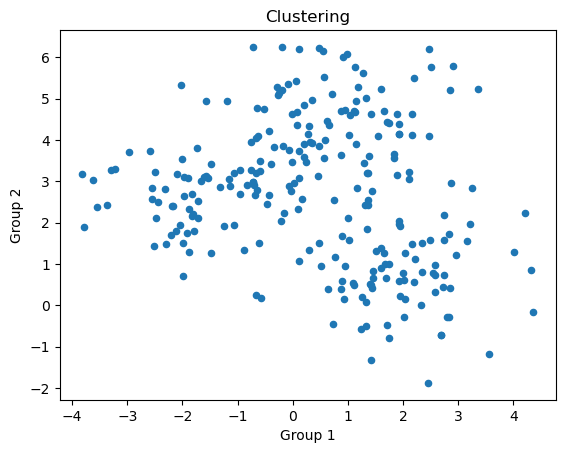

In [5]:
plt.title("Clustering")
plt.scatter(M[:,0],M[:,1],cmap='viridis', s=20)
plt.xlabel('Group 1')
plt.ylabel('Group 2')
plt.show()

In [6]:
n_cluster=3

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

In [8]:
def kmean(n_cluster,M,K,df):
    df1=data.copy()
    rng=np.random.RandomState(6)
    i=rng.permutation(M.shape[0])[:n_cluster]
    centroid=M[i]
    labels=pairwise_distances_argmin(M,centroid)
    print("Initial Cluster : \n",centroid)
    plt.title("Initial Centoids")
    plt.scatter(M[:,0],M[:,1],c=labels,cmap='viridis', s=50)
    plt.scatter(centroid[:,0], centroid[:,1], s=50, marker="*", c="red", label='Cluster Centers')
    plt.xlabel('Group 1')
    plt.ylabel('Group 2')
    plt.legend()
    plt.text(centroid[0][0]-2,centroid[0][1]+0.5, centroid[0], fontsize=9, color='black')
    plt.text(centroid[1][0]-2,centroid[1][1]+0.5, centroid[1], fontsize=9, color='black')
    plt.text(centroid[2][0]-2,centroid[2][1]+0.5, centroid[2], fontsize=9, color='red')
    plt.show()
    j=1
    while True:
        new_center=np.array([M[labels==i].mean(0) for i in range(n_cluster)])
        print("Updated Center : "+str(j),new_center)
        if np.all(centroid==new_center):
            break
        centroid=new_center
        df1["labels"+str(j)]=labels
        plt.title("Updated Centroids : "+str(j))
        plt.scatter(M[:,0],M[:,1],c=labels,cmap='viridis', s=50)
        plt.scatter(centroid[:,0], centroid[:,1], s=50, marker="*", c="red", label='Cluster Centers')
        plt.xlabel('Group 1')
        plt.ylabel('Group 2')
        plt.legend()
        plt.text(centroid[0][0]-2,centroid[0][1]+0.5, centroid[0], fontsize=9, color='black')
        plt.text(centroid[1][0]-2,centroid[1][1]+0.5, centroid[1], fontsize=9, color='black')
        plt.text(centroid[2][0]-2,centroid[2][1]+0.5, centroid[2], fontsize=9, color='red')
        labels=pairwise_distances_argmin(M,centroid)
        plt.show()
        j=j+1
    return df1 

Initial Cluster : 
 [[-0.664308    0.26226317]
 [ 1.89760051  3.15438716]
 [-2.51241475  1.44604725]]


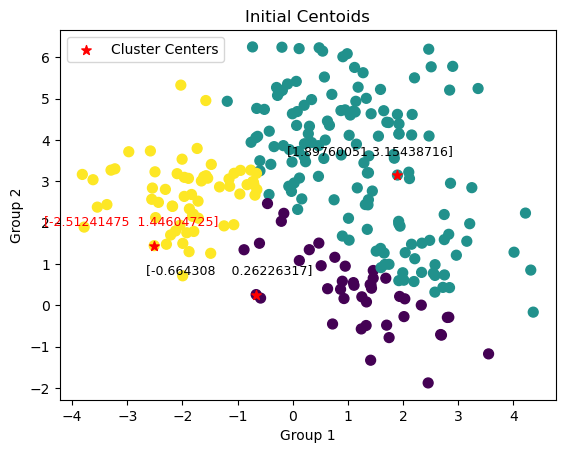

Updated Center : 1 [[ 1.16286679  0.33686664]
 [ 1.24460373  3.41919732]
 [-1.90798621  2.69090648]]


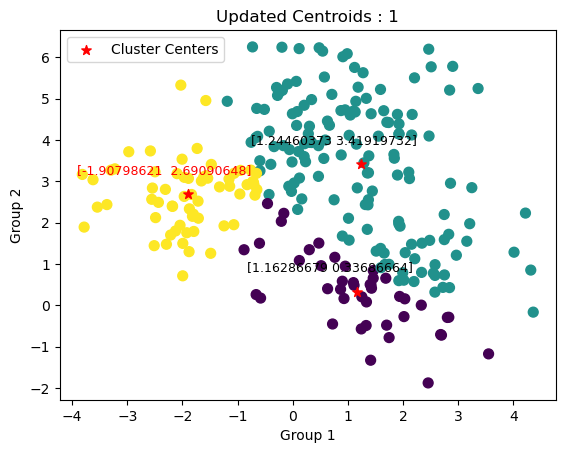

Updated Center : 2 [[ 1.83136021  0.55913812]
 [ 1.02296903  4.14512827]
 [-1.69856369  2.74112856]]


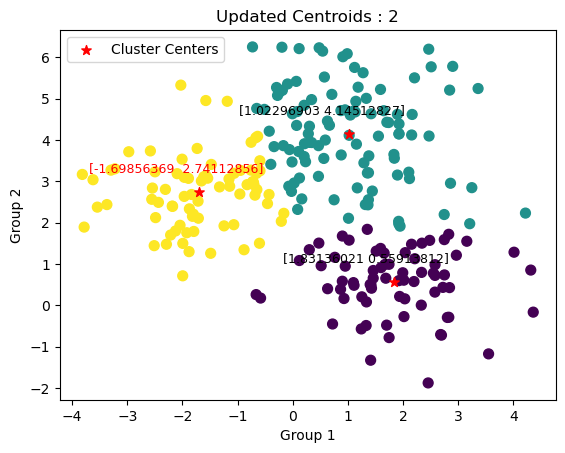

Updated Center : 3 [[ 1.88453062  0.69418459]
 [ 0.94883396  4.35486315]
 [-1.63026542  2.72914429]]


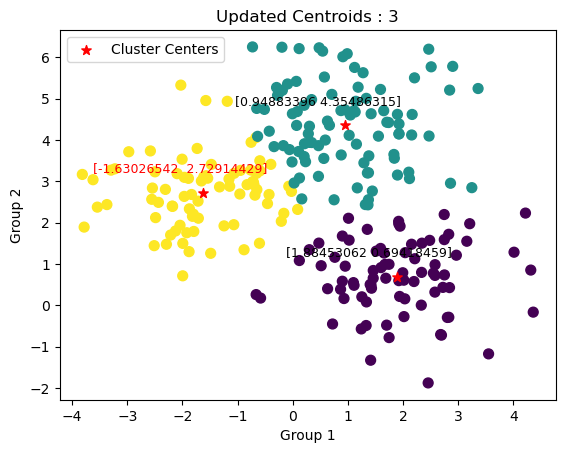

Updated Center : 4 [[ 1.88788068  0.76383381]
 [ 0.90988598  4.455914  ]
 [-1.59221514  2.7022024 ]]


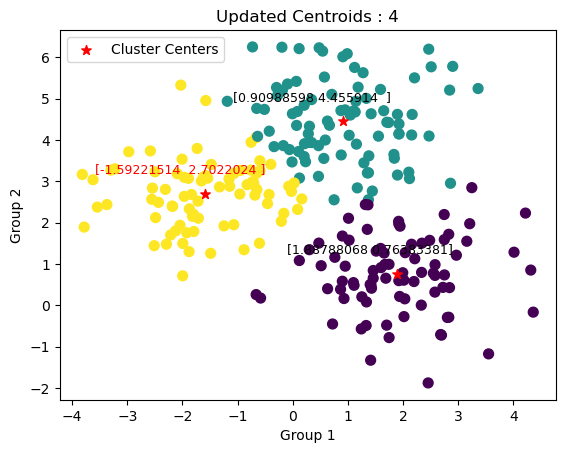

Updated Center : 5 [[ 1.8933616   0.81185279]
 [ 0.86505709  4.48964047]
 [-1.60405149  2.68480777]]


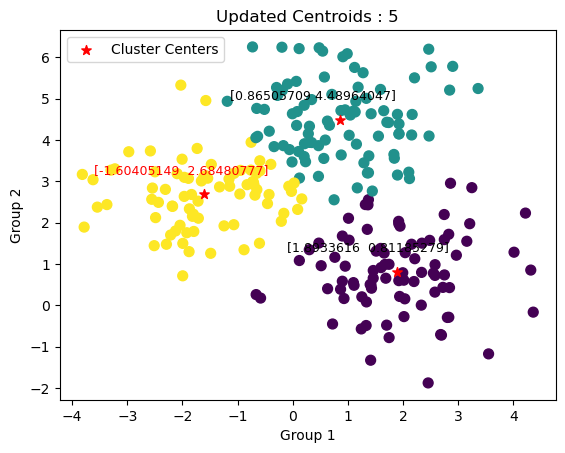

Updated Center : 6 [[ 1.92455269  0.8185551 ]
 [ 0.86505709  4.48964047]
 [-1.592156    2.65414265]]


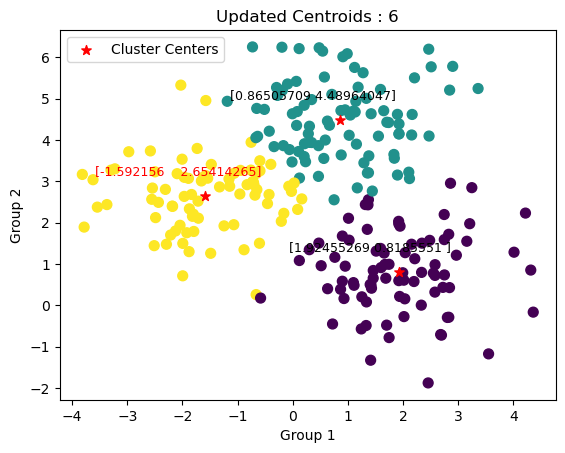

Updated Center : 7 [[ 1.92455269  0.8185551 ]
 [ 0.86505709  4.48964047]
 [-1.592156    2.65414265]]


,Group1,Group2,Target,labels1,labels2,labels3,labels4,labels5,labels6
0,0.866408,0.390847,1,0,0,0,0,0,0
1,0.928442,0.166986,1,0,0,0,0,0,0
2,2.802456,-0.291281,1,0,0,0,0,0,0
3,-1.733808,3.798061,2,2,2,2,2,2,2
4,1.371257,2.557214,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
245,-0.883590,1.347259,2,0,2,2,2,2,2
246,2.576332,0.321876,1,1,0,0,0,0,0
247,-1.891598,3.074586,2,2,2,2,2,2,2
248,1.937103,0.217485,1,0,0,0,0,0,0


In [9]:
kmean(3,M,K,data)

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
MK=KMeans(n_clusters=3,random_state=20)
MK.fit(data)
ypred=MK.predict(data)
accuracy=silhouette_score(data,ypred)
print(accuracy)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5236699048098039


In [12]:
kmean=MK.cluster_centers_
print(kmean)

[[-1.52724489  2.71574482  1.97590361]
 [ 0.92151277  4.48921097  0.03529412]
 [ 1.92019291  0.84618337  1.        ]]


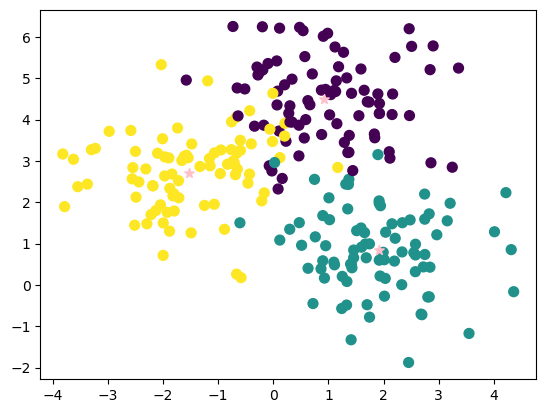

In [13]:
plt.scatter(M[:,0],M[:,1],c=K,cmap='viridis', s=50)
plt.scatter(kmean[:,0], kmean[:,1], s=50, marker="*", c="pink", label='Cluster Centers')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0.5, 1.0, 'Elbow Method for Optimal Number of Clusters')

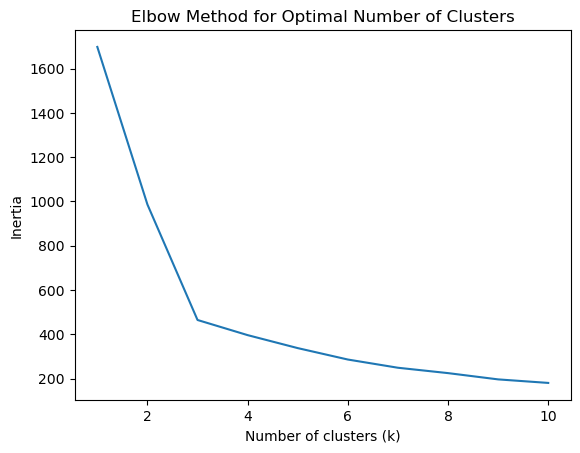

In [14]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')